In [1]:
import os
for dirname, _, filenames in os.walk("/Users/rio/Documents/datasets_for_analysis/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# data = pd.read_csv("ds_salaries.csv")
uri = "/Users/rio/Documents/datasets_for_analysis/ds_salaries.csv"
data = pd.read_csv(uri)

/Users/rio/Documents/datasets_for_analysis/ds_salaries.csv
/Users/rio/Documents/datasets_for_analysis/Lineman_Shops.csv


In [4]:
data.drop(["salary", "salary_currency", "Unnamed: 0"],
         inplace=True, axis=1)

In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [11]:
# Missing values
for col in data.columns:
    print("{} has {} null values".format(
        col, data[col].isnull().sum()
    ), end="\n\n")

work_year has 0 null values

experience_level has 0 null values

employment_type has 0 null values

job_title has 0 null values

salary_in_usd has 0 null values

employee_residence has 0 null values

remote_ratio has 0 null values

company_location has 0 null values

company_size has 0 null values



# Clean & Drop redundant features

In [17]:
data["experience_level"]

0      MI
1      SE
2      SE
3      MI
4      SE
       ..
602    SE
603    SE
604    SE
605    SE
606    MI
Name: experience_level, Length: 607, dtype: object

In [18]:
data["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [21]:
new_el_names = ["Entry", "Medior", "Senior", "Executive"]
data["experience_level"].replace(["EN", "MI", "SE", "EX"],
                                 new_el_names,
                                inplace=True)

In [22]:
data['experiance_level'] = pd.Categorical(data.experience_level,
                                         new_el_names,
                                         ordered=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experiance_level
0,2020,Medior,FT,Data Scientist,79833,DE,0,DE,L,Medior
1,2020,Senior,FT,Machine Learning Scientist,260000,JP,0,JP,S,Senior
2,2020,Senior,FT,Big Data Engineer,109024,GB,50,GB,M,Senior
3,2020,Medior,FT,Product Data Analyst,20000,HN,0,HN,S,Medior
4,2020,Senior,FT,Machine Learning Engineer,150000,US,50,US,L,Senior


In [23]:
data['employment_type'].replace(['FL','PT','FT','CT'],['Freelance','Part-time','Full-time','Contract'],inplace=True)
data['employment_type'] = pd.Categorical(data['employment_type'],['Contract','Freelance','Part-time','Full-time'],ordered=True)

In [32]:
# object type
data.company_size.dtype

CategoricalDtype(categories=['S', 'M', 'L'], ordered=True)

In [35]:
# convert to categorical type
data['company_size'] = pd.Categorical(data['company_size'],['S','M','L'],ordered=True)
data.company_size.dtype

CategoricalDtype(categories=['S', 'M', 'L'], ordered=True)

In [36]:
data['job_title'] = pd.Categorical(data['job_title'])
data['company_location'] = pd.Categorical(data['company_location'])
data['employee_residence'] = pd.Categorical(data['employee_residence'])



In [37]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'experiance_level'],
      dtype='object')

In [39]:
data.work_year.dtype

dtype('int64')

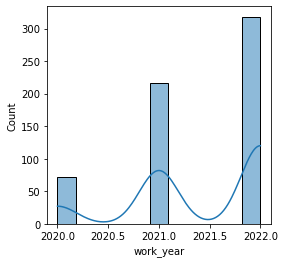

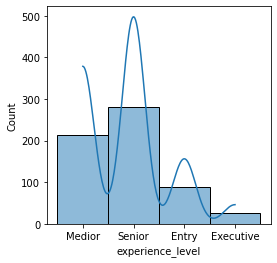

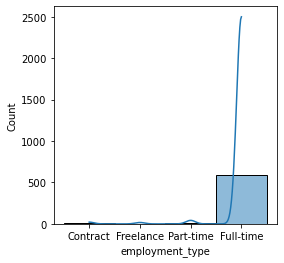

<Figure size 288x288 with 0 Axes>

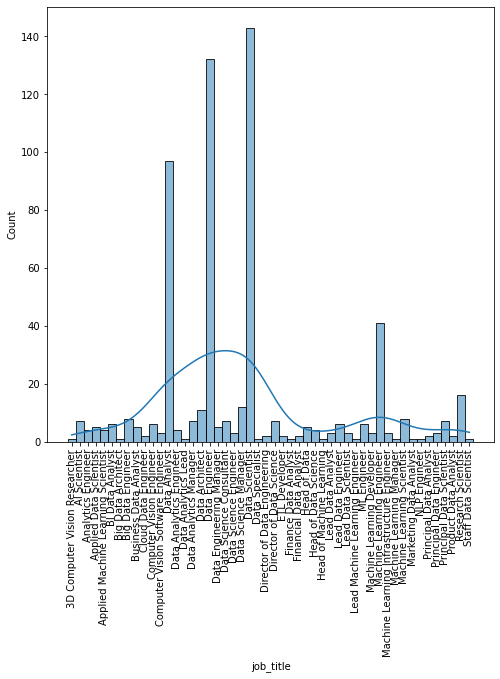

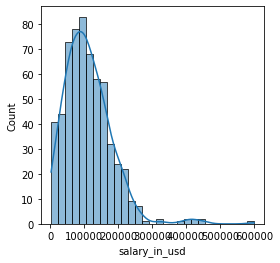

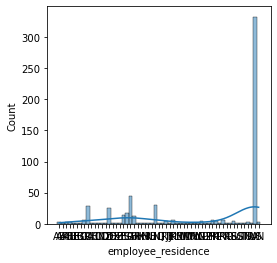

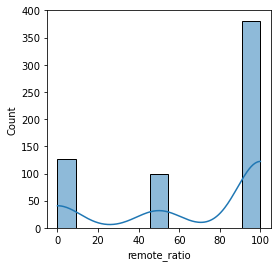

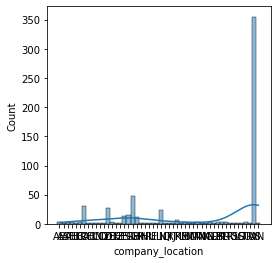

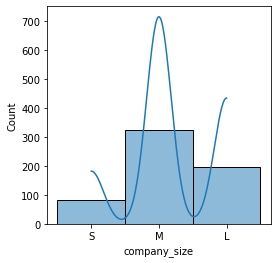

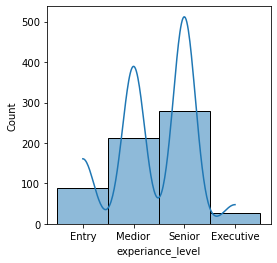

In [48]:
for col in data.columns:
    # plt.figure(figsize=(8,8))
    plt.figure(figsize=(4,4))
    # sns.histplot(data=data, x=col, kde=1)
    if col == "job_title":
        plt.figure(figsize=(8,8))
        sns.histplot(data=data, x=col, kde=1)
        plt.xticks(rotation=90)
    else:
        sns.histplot(data=data, x=col, kde=1)
plt.show()

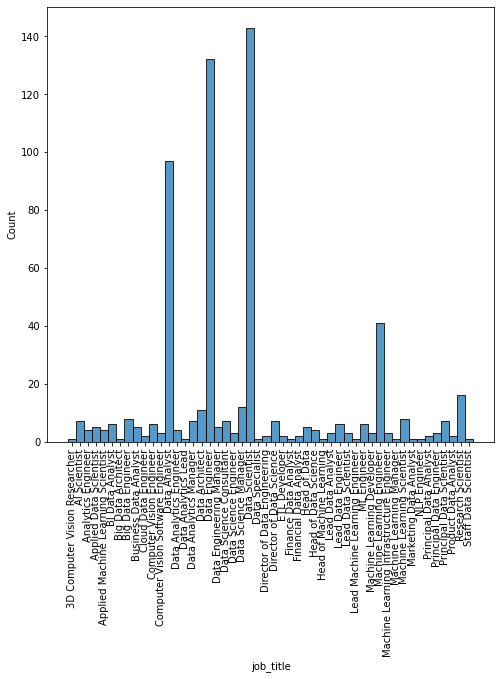

In [53]:
plt.figure(figsize=(8,8))
sns.histplot(data, x='job_title')
plt.xticks(rotation=90)
plt.show()

In [62]:
data.job_title.values

['Data Scientist', 'Machine Learning Scientist', 'Big Data Engineer', 'Product Data Analyst', 'Machine Learning Engineer', ..., 'Data Engineer', 'Data Engineer', 'Data Analyst', 'Data Analyst', 'AI Scientist']
Length: 607
Categories (50, object): ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', ..., 'Principal Data Scientist', 'Product Data Analyst', 'Research Scientist', 'Staff Data Scientist']

In [84]:
# for job in data.job_title:
    # print(job, data.job_title[job].count()
pd.unique(data.job_title)
    

['Data Scientist', 'Machine Learning Scientist', 'Big Data Engineer', 'Product Data Analyst', 'Machine Learning Engineer', ..., 'ETL Developer', 'Head of Machine Learning', 'NLP Engineer', 'Lead Machine Learning Engineer', 'Data Analytics Lead']
Length: 50
Categories (50, object): ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', ..., 'Principal Data Scientist', 'Product Data Analyst', 'Research Scientist', 'Staff Data Scientist']

In [70]:
data.job_title.describe()

count                607
unique                50
top       Data Scientist
freq                 143
Name: job_title, dtype: object

In [71]:
data.job_title

0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: job_title, Length: 607, dtype: category
Categories (50, object): ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', ..., 'Principal Data Scientist', 'Product Data Analyst', 'Research Scientist', 'Staff Data Scientist']

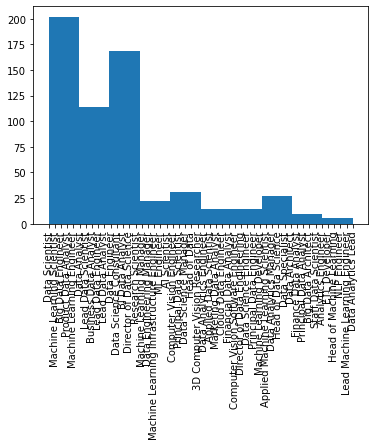

In [76]:
plt.hist(x=data.job_title)
plt.xticks(rotation=90)
plt.show()

In [79]:
data.job_title

0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: job_title, Length: 607, dtype: category
Categories (50, object): ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', ..., 'Principal Data Scientist', 'Product Data Analyst', 'Research Scientist', 'Staff Data Scientist']

In [80]:
# Data scientist, data engineer, machine learning engineer 
# and data analysts are the most common job titles.

# Lets take a look at how each factors influences the salary.



In [89]:
data.work_year.dtype

dtype('int64')

In [90]:
# "salary_in_usd"
data['work_year'] = data['work_year'].astype('int64')

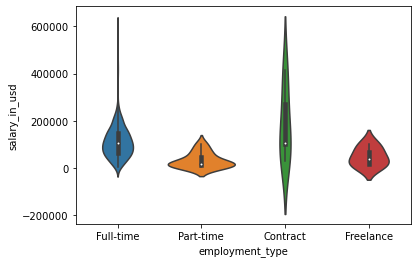

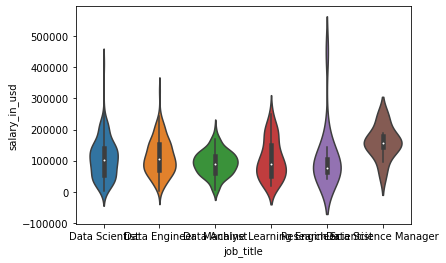

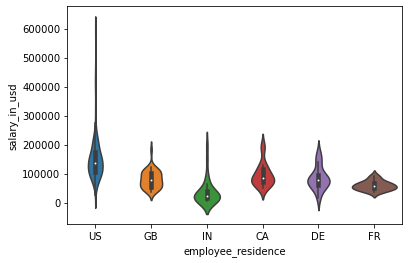

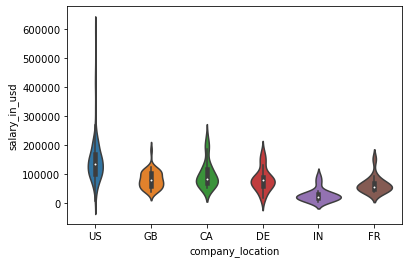

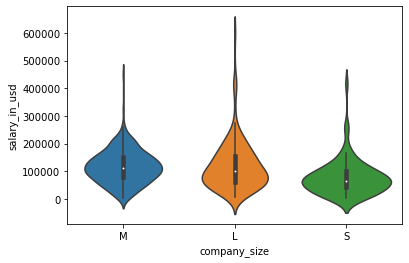

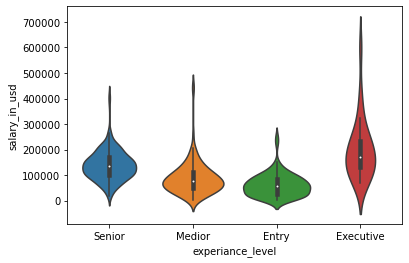

In [96]:
siu = "salary_in_usd"
for col in data.columns:
    if col != siu:
        if data[col].dtype.name != 'category':
            # sns.regplot(data=data,
            #            y=siu,
            #            x=col,
            #            scatter_kws={'alpha': .3}
            #            )
            ...
            plt.show()
        elif data[col].dtype.name == 'category':
            sns.violinplot(data=data,
                          y=siu,
                          x=col,
                          alpha=.3,
                        order=data[col].value_counts().iloc[:6]
                           .index
                           
                          )
            plt.show()